# 机器学习实验报告-lab2-回归模型
**姓名：** 郭裕彬
**学号：** 2114052
**专业：** 物联网工程
# 实验要求
## 基本要求
将数据集winequality-white.csv按照4:1划分为训练集和测试集。
1. 构造线性回归模型，并采用批量梯度下降**和**随机梯度下降进行优化；输出训练集和测试集的均方误差（MSE），画出MSE收敛曲线。
2. 对于批量梯度下降**和**随机梯度下降，采用不同的学习率并进行MSE曲线展示，分析选择最佳的学习率。

特别需要注意：
- 划分数据集时尽可能保持数据分布的一致性，保持样本类别比例相似，可采用分层采样的方式。
- 需要对数据集进行一定的预处理

### 导入使用的包和读入数据

In [2]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data=pd.read_csv("winequality-white.csv")

### 划分数据集

In [3]:
groupData=data.groupby('quality')
for name,group in groupData:
    print(f"{name}:")
    print(group)
numTuples=[20,163,1457,2198,880,175,5]
totalTuples = sum(numTuples)
testRatio=1/5
trainRatio=4/5
trainData=pd.DataFrame()
testData=pd.DataFrame()
for quality in range(3,10):
    qualityData=data[data['quality']==quality]
    trainSub,testSub=train_test_split(qualityData,test_size=testRatio,train_size=trainRatio,stratify=qualityData['quality'])
    trainData=pd.concat([trainData,trainSub])
    testData=pd.concat([testData,testSub])
print("train:",len(trainData))
print("test:",len(testData))

3:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
251             8.5             0.260         0.21           16.20      0.074   
253             5.8             0.240         0.44            3.50      0.029   
294             9.1             0.590         0.38            1.60      0.066   
445             7.1             0.320         0.32           11.00      0.038   
740             6.9             0.390         0.40            4.60      0.022   
873            10.3             0.170         0.47            1.40      0.037   
1034            7.9             0.640         0.46           10.60      0.244   
1229            8.3             0.330         0.42            1.15      0.033   
1417            8.6             0.550         0.35           15.55      0.057   
1484            7.5             0.320         0.24            4.60      0.053   
1688            6.7             0.250         0.26            1.55      0.041   
1931            7.1      

### 处理数据集

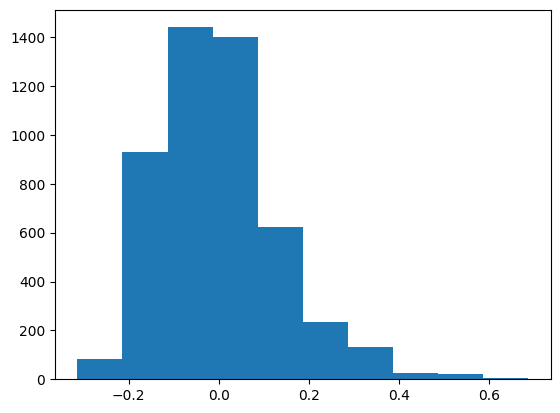

In [4]:
# 中心化代码
def Normalization_fun(x):
    # 特征零均值
    x = (x - np.mean(x, 0)) / (np.max(x, 0) - np.min(x, 0))
    return x

# 提取特征和标签
X = data.iloc[:, 0:-1]  # N D
X = Normalization_fun(X)
Y = data.iloc[:, -1]

# 可视化中心化后的sulphates特征
import matplotlib.pyplot as plt
plt.hist(X["sulphates"])
plt.show()

# 这里注意一个小trick：回归系数会比特征x多一维，为了向量相乘方便，可以在训练集X左侧添加全为1的一列
data0 = pd.concat([pd.DataFrame(np.ones(X.shape[0]), columns=['x0']), X], axis=1)

In [5]:
x_train=Normalization_fun(trainData.iloc[:, 0:-1])
y_train=Y=trainData.iloc[:, -1]
x_train=np.append(pd.DataFrame(np.ones(x_train.shape[0])),x_train,axis=1)
y_train=list(y_train)

x_test=Normalization_fun(testData.iloc[:, 0:-1])
y_test=Y=testData.iloc[:, -1]
x_test=np.append(pd.DataFrame(np.ones(x_test.shape[0])),x_test,axis=1)
y_test=list(y_test)

### 损失函数和两种梯度下降的实现

In [6]:
def calMSE(x,y,theta):
    loss=1/(2*len(x))*np.dot((y-np.dot(x,theta)).T,(y-np.dot(x,theta)))
    return loss

#批量梯度下降
def BGD(x,y,theta,rate,epochs):
    cost=np.zeros(epochs)
    for epoch in range(epochs):
        cost[epoch]=calMSE(x,y,theta)
        theta=theta + rate/len(x)*np.dot((y-np.dot(x,theta)).T,x)
        #θ=θ+α/m*(y-X@θ)^T@x
    return theta,cost
#随机梯度下降
def SGD(x,y,theta,rate,epochs):
    cost = np.zeros(epochs)
    for epoch in range(epochs):
        j=np.random.randint(12)#随机抽取样本
        cost[epoch] = calMSE(x, y, theta)
        theta = theta + rate * x[j]*(y[j]-np.dot(x[j],theta))
        #θ=θ+α(yj-xj@θ)xj
    return theta, cost

def drawMSE(epochs,cost):
    plt.plot(range(1,epochs+1),cost)
    plt.xlabel('epochs')
    plt.ylabel('MSE')
    plt.show()

训练集均方误差： 0.32405266555712536
测试集均方误差： 0.31780822524196733


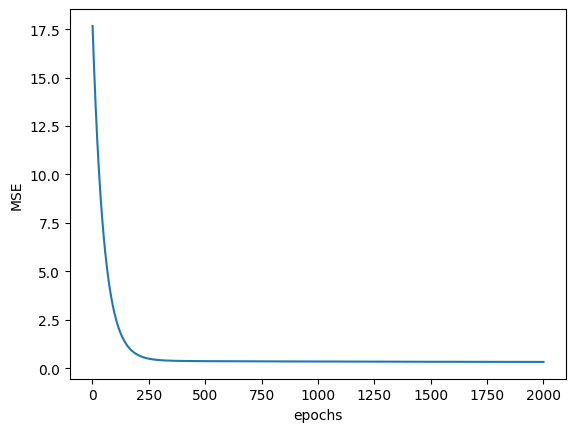

训练集均方误差： 4.625292044760901
测试集均方误差： 4.622949777121005


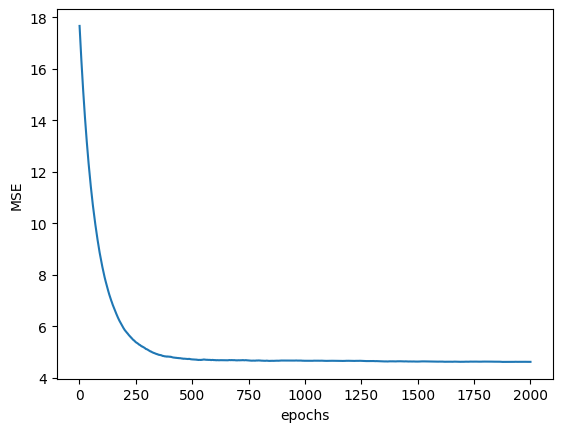

In [7]:
theta=np.zeros(x_train.shape[1])
rate=0.01 #初始化学习率
epochs=2000 #训练次数


#BGD结果
result_train_BGD=BGD(x_train,y_train,theta,rate,epochs)
result_test_BGD=calMSE(x_test, y_test, result_train_BGD[0])
print("训练集均方误差：",result_train_BGD[1][epochs-1])
print("测试集均方误差：",result_test_BGD)
drawMSE(epochs,result_train_BGD[1])

#SGD结果
result_train_SGD=SGD(x_train, y_train, theta, rate, epochs)
result_test_SGD=calMSE(x_test, y_test, result_train_SGD[0])
print("训练集均方误差：", result_train_SGD[1][epochs - 1])
print("测试集均方误差：", result_test_SGD)
drawMSE(epochs, result_train_SGD[1])

### 测试不同学习率，画出对应曲线
从结果上观察，BGD的最佳学习率是0.1左右，SGD因为学习率增大会导致波动幅度剧增，考虑到这个因素，最佳学习率在0.1~0.3附近，但测试集均方误差最小的学习率是1。

学习率 0.001 的BGD测试集均方误差为 0.31780822524196733
学习率 0.003 的BGD测试集均方误差为 0.31780822524196733
学习率 0.01 的BGD测试集均方误差为 0.31780822524196733
学习率 0.03 的BGD测试集均方误差为 0.31780822524196733
学习率 0.1 的BGD测试集均方误差为 0.31780822524196733
学习率 0.3 的BGD测试集均方误差为 0.31780822524196733
学习率 1.0 的BGD测试集均方误差为 0.31780822524196733


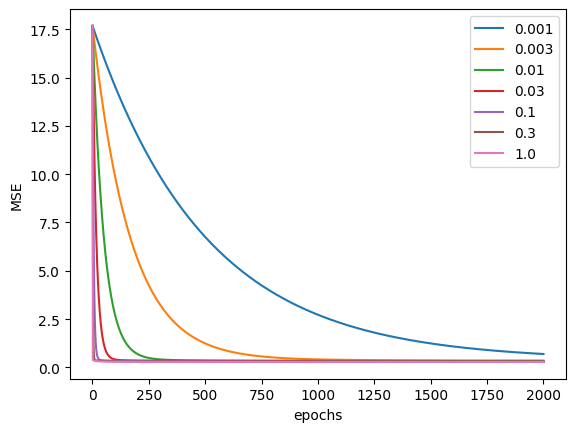

学习率 0.001 的SGD测试集均方误差为 5.9337123311027105
学习率 0.003 的SGD测试集均方误差为 4.698253651084451
学习率 0.01 的SGD测试集均方误差为 4.624486704292548
学习率 0.03 的SGD测试集均方误差为 4.582941631957514
学习率 0.1 的SGD测试集均方误差为 4.555577993077534
学习率 0.3 的SGD测试集均方误差为 4.547453261924046
学习率 1.0 的SGD测试集均方误差为 4.532360232106922


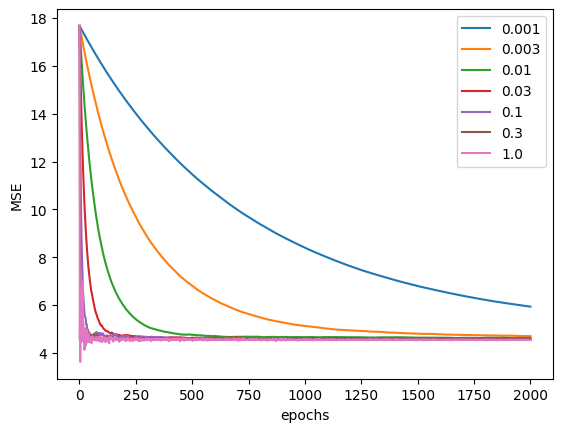

In [8]:
rates = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1])
for rate in rates:
    result_train_BGD = BGD(x_train, y_train, theta, rate, epochs)
    result_test_BGD_test_BGD = calMSE(x_test, y_test, result_train_BGD[0])
    plt.plot(range(1, epochs + 1), result_train_BGD[1],label=rate)
    print("学习率",rate,"的BGD测试集均方误差为",result_test_BGD)
plt.legend()
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.show()

for rate in rates:
    result_train_SGD = SGD(x_train, y_train, theta, rate, epochs)
    result_test_SGD = calMSE(x_test, y_test, result_train_SGD[0])
    plt.plot(range(1, epochs + 1), result_train_SGD[1],label=rate)
    print("学习率",rate,"的SGD测试集均方误差为",result_test_SGD)
plt.legend()
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.show()

## 中级要求
探究回归模型在机器学习和统计学上的差异。
- 回归模型在机器学习领域和统计学领域中都十分常用，而且使用方法也相似，但其实际的含义具有本质的区别。我们希望同学们从回归模型的角度更加充分地理解机器学习和统计学的区别。
目标和重点：

1. 在机器学习中，回归模型通常用于建立预测模型，其主要目标是通过输入特征来预测一个或多个目标变量。机器学习强调模型的预测性能，如准确度、泛化能力等。而在统计学中，回归模型通常用于探索和理解数据中的关系。统计回归的主要目标是分析自变量和因变量之间的关系，以了解变量之间的相关性和因果关系。

2. 通常，机器学习中的数据集相对较大，强调特征工程，数据预处理和模型训练。机器学习模型可以处理大规模数据，且不要求强调对数据分布的假设。统计回归通常要求对数据进行严格的假设检验，包括对数据的正态性、方差齐性等方面进行检查。统计模型通常基于较小的、代表性的样本数据，更加注重推断和统计显著性。

3. 评估机器学习模型的性能通常涉及使用训练数据和测试数据，以检查模型的预测准确度、召回率、F1分数等性能指标；统计模型的评估通常包括参数估计的标准误差、置信区间、假设检验等，以检验模型系数的显著性和模型拟合度。


## 高级要求
编程实现岭回归算法，求解训练样本的岭回归模型，平均训练误差和平均测试误差（解析法、批量梯度下降法和随机梯度下降法**均可**）。

$$Loss=\frac{1}{2N}\sum_{i=1}^N(y^{(i)}-f(\pmb{x}^{(i)},\pmb{\theta}))^2+\lambda \sum_{j=0}^N\theta_j^2$$

In [9]:
#损失函数，加入L2范数惩罚项
def calRidgeMSE(x,y,theta,_lambda):
    loss=1/(2*len(x))*(np.dot((y-np.dot(x,theta)).T,(y-np.dot(x,theta)))+_lambda*np.dot(theta.T,theta))
    return loss

def Ridge(x, y, rate, epochs,_lambda):
    I=np.eye(np.dot(x.T,x).shape[0])
    I=_lambda*I
    theta=np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)+I),x.T),y)
    cost=calRidgeMSE(x,y,theta,_lambda)
    return theta,cost


_lambda=0.1
result_train_Ridge=Ridge(x_train,y_train,rate,epochs,_lambda)
result_test_Ridge=calRidgeMSE(x_test, y_test, result_train_Ridge[0],_lambda)
print("训练所得回归系数为：",result_train_Ridge[0])
print("训练集均方误差：", result_train_Ridge[1])
print("测试集均方误差：",result_test_Ridge)


训练所得回归系数为： [ 5.87807306  0.33145793 -1.82753051  0.08493039  4.34816013 -0.05311914
  1.06610694 -0.1448918  -5.61234445  0.63592715  0.44160446  1.50677298]
训练集均方误差： 0.28476136471142544
测试集均方误差： 0.34935075400970506
